# Methodolgy

In this notebook aims to find most suitable model via CRISP-DM strategy for Bank customers which could churn. CRISP-DM is basically data mining methodology but nowadays it use to data science project. Although different approaches have been developed in the field of data science over the years, at the last point reached, where a data science project can be started, which steps should be followed, the outputs of the phases of the project and the measurable steps during the project can be managed with the method shortened as CRISP-DM.

# CRISP-DM steps
CRISP-DM (Cross Industry Standard Process for Data Mining)
1. Business Understanding: This is the understanding of the business and the understanding of the business being processed.
2. Data Understanding: It is the phase of having information about the data structure.
3. Data Preparation: This is the data preparation phase.
4. Modeling: Creating a model with data is the stage.
5. Evaluation: This is the evaluation phase of the model.
6. Deployment: Application is the phase of action. After the model is created, the application is started by programming.
    
## 1. Business Understanding
Define the problem from a business perspective. In this case, the problem is identifying customers who are likely to churn. The bank can then use this model to identify customers who are likely to churn and take action to prevent them from leaving.

## 2. Data Understanding
Collect and familiarize yourself with the data. This could involve understanding the customer's demographic information, account details, transaction history, etc.
First of all importing all libraries

In [5]:
"""Data Preparation Library"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

"""Models Library"""
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

"""Model Evaluation"""
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

"""Other"""
import os
import warnings
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
%matplotlib inline
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category = ConvergenceWarning)

Importing dataset

In [7]:
# Importing dataset
dt = pd.read_csv("../data/churn-modelling/Churn_Modelling.csv")

# First 5 rows of data
dt.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


This dataset belongs to the bank that is hidden its name because of data security. The dataset consists of 13 attributes and 10,000 rows. The following shows description of attributes.
1.	Customer ID: This attribute is unique and assume that primary key
2.	Surname: it belongs to surname of customer and string values
3.	Geography: it shows country of customer 
4.	Gender: male/female 
5.	Credit Score: it gives credit score of customers. That score calculates interbank system. High score shows that the customer debt high repayment capacity. 
6.	Age: age of customers
7.	Tenure: The number of ages the customer is in the bank.
8.	Balance: Customer's money in the bank.
9.	Number of Products: Number of products owned by the customer.
10.	Credit Card: Whether the customer has a credit card
11.	Active Status: Customer's presence in the bank
12.	Estimated Salary: Customer's estimated salary
13.	Exited: Churn or not

Remove unneeded columns which are RowNumber, CustomerId and Surnmae


In [8]:
dt = dt.drop(columns=["RowNumber","CustomerId","Surname"])
dt.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


There are 10.000 unique customers. Geography and gender are categorical variables. Geography consist of France (%50), Germany (%25) and Spain (%25). Also, gender contain %54 male and %46 female.

Basic description for continuous variables

In [9]:
dt.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Above table (basic statical description) shows descriptive statistics of continuous variables from original data. Credit score is between 350 and 850. The average age of the customers is 39. Tenure is maximum ten years that assume the age of the bank. Minimum value and first quantiles of Balance are equal 0, which means the distribution may not be normal.

Missing values checking

In [10]:
pd.DataFrame(dt.isnull().sum(),columns=["Count"])

,Count
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


Exited column that is flag to define for customers whether churn (%80) or not (%20). Thus, target feature is determined. Other features allow the predictor to classify the value of the target variable. For this reason, the relationship between the target column and other columns is examined in the following visualizations 

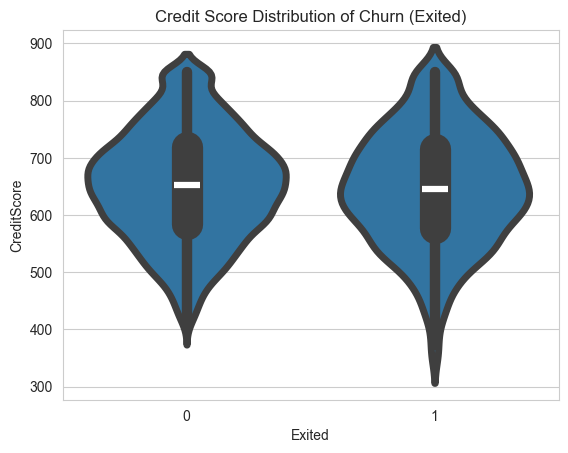

In [11]:
# Exited -- CreditScore
sns.violinplot( x=dt["Exited"], y=dt["CreditScore"], linewidth=5)
plt.title("Credit Score Distribution of Churn (Exited)")
plt.show()

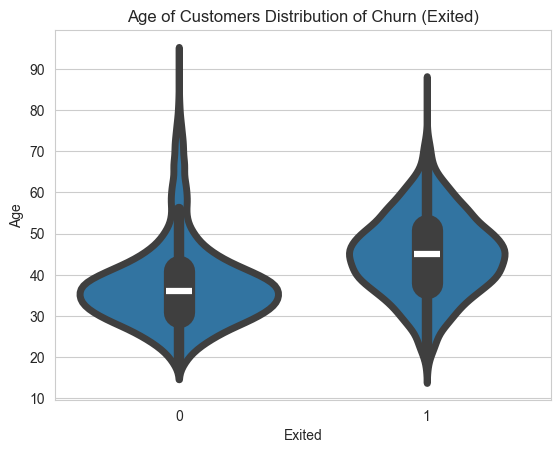

In [12]:
# Exited -- Age
sns.violinplot( x=dt["Exited"], y=dt["Age"], linewidth=5)
plt.title("Age of Customers Distribution of Churn (Exited)")
plt.show()

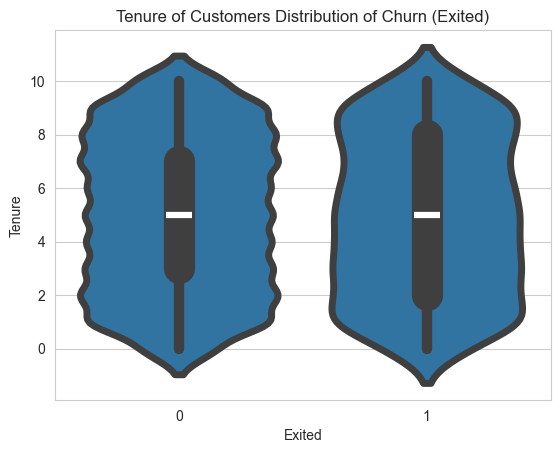

In [13]:
# Exited -- Tenure
sns.violinplot( x=dt["Exited"], y=dt["Tenure"], linewidth=5)
plt.title("Tenure of Customers Distribution of Churn (Exited)")
plt.show()

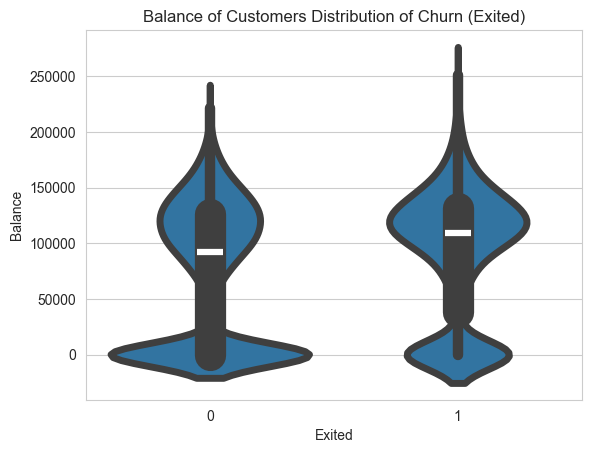

In [14]:
# Exited -- Balance
sns.violinplot( x=dt["Exited"], y=dt["Balance"], linewidth=5)
plt.title("Balance of Customers Distribution of Churn (Exited)")
plt.show()

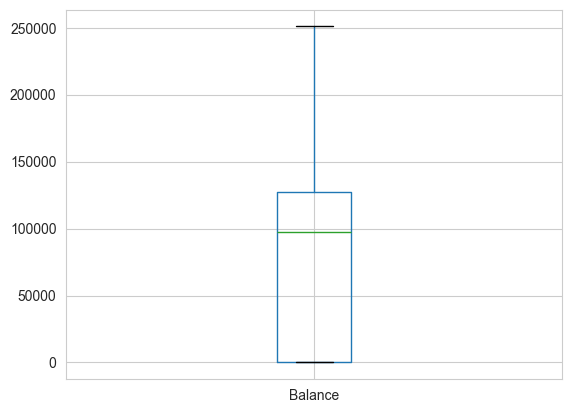

In [15]:
# Balance boxplot
dt[["Balance"]].boxplot();

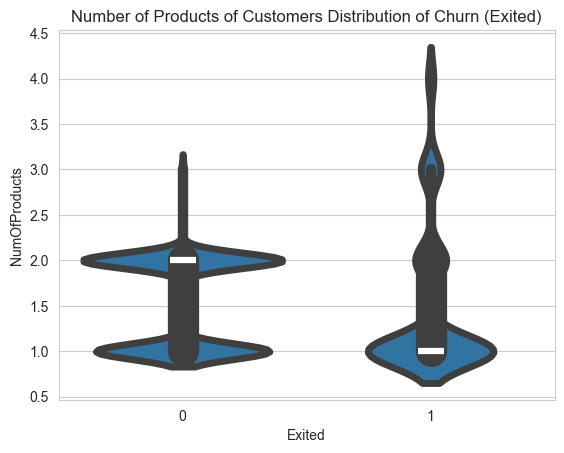

In [16]:
# Exited -- NumOfProducts
sns.violinplot( x=dt["Exited"], y=dt["NumOfProducts"], linewidth=5)
plt.title("Number of Products of Customers Distribution of Churn (Exited)")
plt.show()

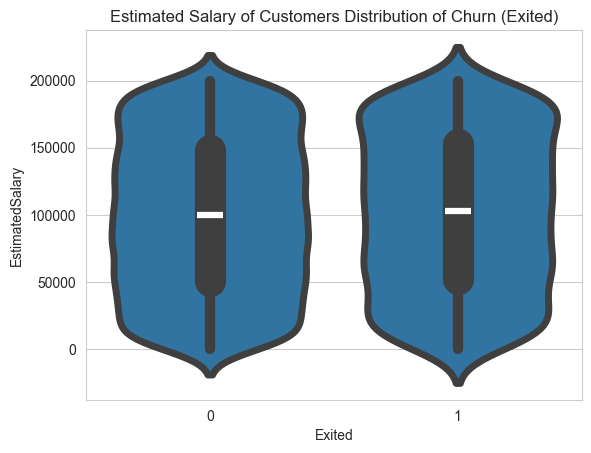

In [17]:
# Exited -- EstimatedSalary
sns.violinplot( x=dt["Exited"], y=dt["EstimatedSalary"], linewidth=5)
plt.title("Estimated Salary of Customers Distribution of Churn (Exited)")
plt.show()

Above figures shows the relationship between six continuous variables and target variable in the form of violin graph. Balance, Tenure, Estimated Salary and Credit score almost appear to be irregular for both churn and not churn. Customers who churn higher age than other. Churn customers When the product numbers are examined; could be interpreted by looking at the graph that customers reduce their products before leaving.

The following figure in the correlation between the six variables, there is no significant value between any two variables. Only a negative relationship exists between Balance and Number of Product 

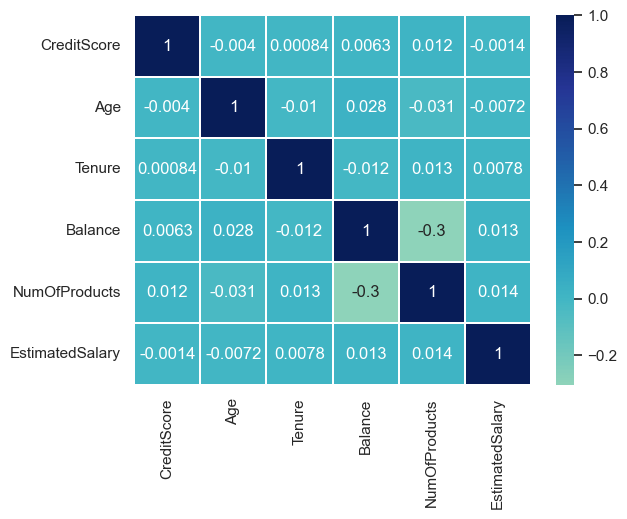

In [18]:

# Correlation Matrix
correlationColumns = dt[["CreditScore","Age","Tenure"
    ,"Balance","NumOfProducts","EstimatedSalary"]]

sns.set()
corr = correlationColumns.corr()
ax = sns.heatmap(corr
                 ,center=0
                 ,annot=True
                 ,linewidths=.2
                 ,cmap="YlGnBu")
plt.show()

## 3. DATA PREPARATION
Since there is a target variable in data of the Bank, classification is made by following the supervised learning method. First, to define which target variable is the model, the target variable and the other variables are separated from each other (Exited and other). Customer ID, Row Number and Surname variables are excluded from the data set because they cannot be input for the model.

In [34]:
# Decomposition predictors and target
predictors = dt.iloc[:,0:10]
target = dt.iloc[:,10:]
predictors

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


The characters in the gender variable are replaced with 0 or 1. 

In [35]:

predictors['isMale'] = predictors['Gender'].map({'Male':1, 'Female':0})


Dummy variables was reconstructed as 1 or 0 for the three values in the Geography data. Therefore, three different variables were formed. However, the third variable was excluded from the data since two variables included in all three cases. 

In [36]:
# Geography one shot encoder
predictors[['France', 'Germany', 'Spain']] = pd.get_dummies(predictors['Geography'])
# Removal of unused columns.
predictors = predictors.drop(columns=['Gender','Geography','Spain'])
predictors.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,isMale,France,Germany
0,619,42,2,0.00,1,1,1,101348.88,0,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False
2,502,42,8,159660.80,3,1,0,113931.57,0,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False


Modelling preparation applies transformation methodology. Three variables (Credit Score, Estimated Salary and Balance) were transformed by normalizing. All values in the variables are represented between 1 and 0.

In [37]:
normalization = lambda x:(x-x.min()) / (x.max()-x.min())
transformColumns = predictors[["Balance","EstimatedSalary","CreditScore"]]
predictors[["Balance","EstimatedSalary","CreditScore"]] = normalization(transformColumns)

# All Predictors Columns
predictors.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,isMale
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,0.601058,38.921800,5.012800,0.304848,1.530200,0.70550,0.515100,0.500441,0.545700
std,0.193307,10.487806,2.892174,0.248696,0.581654,0.45584,0.499797,0.287580,0.497932
min,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,0.468000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,0.254977,0.000000
50%,0.604000,37.000000,5.000000,0.387402,1.000000,1.00000,1.000000,0.500960,1.000000
75%,0.736000,44.000000,7.000000,0.508749,2.000000,1.00000,1.000000,0.746955,1.000000
max,1.000000,92.000000,10.000000,1.000000,4.000000,1.00000,1.000000,1.000000,1.000000


In order to measure the accuracy rate in the modeling, the data set was divided into test and train.

In [38]:
# Train and test splitting
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size=0.25, random_state=0)
pd.DataFrame({"Train Row Count":[x_train.shape[0],y_train.shape[0]],
              "Test Row Count":[x_test.shape[0],y_test.shape[0]]},
             index=["X (Predictors)","Y (Target)"])

,Train Row Count,Test Row Count
X (Predictors),7500,2500
Y (Target),7500,2500


In [39]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,isMale,France,Germany
2967,0.458,39,5,0.469646,3,0,0,0.029100,0,False,True
700,0.800,32,5,0.000000,2,1,0,0.478045,0,True,False
3481,0.758,34,9,0.212437,2,1,1,0.214242,0,False,False
1621,0.678,38,5,0.299226,1,1,1,0.043206,1,False,False
800,0.510,52,7,0.000000,2,1,1,0.869788,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9225,0.488,32,4,0.478581,2,1,1,0.814829,0,False,True
4859,0.888,22,4,0.456122,1,1,1,0.538759,0,False,False
3264,0.776,35,5,0.642787,2,1,0,0.907178,1,True,False
9845,0.480,38,9,0.000000,2,1,1,0.743764,0,False,False


After all these preparations, the dataset is made ready for modeling, which is another step of CRISP-DM method.

## 4. MODELING
After the pre-processing of the data, one- or multiple-specific modelling techniques, which are connected to the data mining goal, are selected and data could be modelled. In order to test cogency and the quality of the model, a procedure should be created before the model is built.  Afterward, in order to produce one or more models, the modelling tool could start running on the ready set of data. 

In [40]:
# Numpy exceptions handle
y_train = y_train.values.ravel()

In [41]:
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)
dtc_acc = accuracy_score(y_test,y_pred_dtc)

# Logistic Regression
logr = LogisticRegression()
logr.fit(x_train,y_train)
y_pred_logr = logr.predict(x_test)
logr_acc = accuracy_score(y_test,y_pred_logr)

# Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
gnb_acc = accuracy_score(y_test,y_pred_gnb)

# K Neighbors Classifier
knn = KNeighborsClassifier( metric='minkowski')
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
knn_acc = accuracy_score(y_test,y_pred_knn)

# Random Forrest
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
rfc_acc = accuracy_score(y_test,y_pred_rfc)

# Neural Network
nnc = MLPClassifier()
nnc.fit(x_train,y_train)
y_pred_nnc = nnc.predict(x_test)
nnc_acc = accuracy_score(y_test,y_pred_nnc)

# Xgboost Classifier
xgboast = xgb.XGBClassifier()
xgboast.fit(x_train, y_train)
xgboast = xgboast.score(x_test,y_test)

pd.DataFrame({"Algorithms":["Decision Tree","Logistic Regression","Naive Bayes","K Neighbors Classifier","Random Ferest","Neural Network","Xgboost Classifier"],
              "Scores":[dtc_acc,logr_acc,gnb_acc,knn_acc,rfc_acc,nnc_acc,xgboast]})


,Algorithms,Scores
0,Decision Tree,0.7944
1,Logistic Regression,0.8072
2,Naive Bayes,0.8096
3,K Neighbors Classifier,0.8272
4,Random Ferest,0.8712
5,Neural Network,0.8524
6,Xgboost Classifier,0.8512


When the accuracy of all models is compared, it is seen that XGBoost algorithm is higher (85%)

## 5. EVALUATION
In the evaluation stage, the obtained model obtained should evaluated more carefully and the steps while building the model should review in order to be sure that the model appropriately achieves the business objectives.

In [21]:
# Cross validation test
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('xgboast', XGBClassifier()))

# evaluate each model in turning kfold results
results_boxplot = []
names = []
results_mean = []
results_std = []
p,t = predictors.values, target.values.ravel()
for name, model in models:
    cv_results = cross_val_score(model, p,t, cv=10)
    results_boxplot.append(cv_results)
    results_mean.append(cv_results.mean())
    results_std.append(cv_results.std())
    names.append(name)
pd.DataFrame({"Algorithm":names,
                                "Accuracy Mean":results_mean,
                                "Accuracy":results_std})

,Algorithm,Accuracy Mean,Accuracy
0,LR,0.810199,0.007798
1,KNN,0.828303,0.009631
2,CART,0.793496,0.014465
3,RFC,0.851900,0.007528
4,NB,0.820400,0.007592
5,SVM,0.844599,0.005939
6,xgboast,0.864299,0.009035


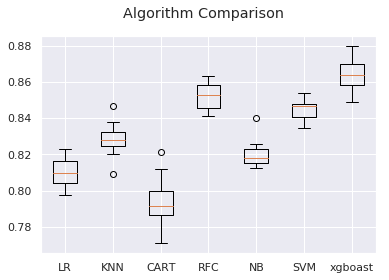

In [22]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_boxplot)
ax.set_xticklabels(names)
plt.show()

Using the cross-validation method, different train and test sets were created and the model re-run iteratively and the result was increased from 86% to 87%. The accuracy of different algorithms was compared with the application of cross validation method.

In [23]:
#Grid Seach for XGboast
params = {
        'min_child_weight': [1, 2, 3],
        'gamma': [1.9, 2, 2.1, 2.2],
        'subsample': [0.4,0.5,0.6],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3,4,5]
        }
gd_sr = GridSearchCV(estimator=XGBClassifier(),
                     param_grid=params,
                     scoring='accuracy',
                     cv=5,
                     )
gd_sr.fit(predictors, target.values.ravel())
best_parameters = gd_sr.best_params_
pd.DataFrame(best_parameters.values(),best_parameters.keys(),columns=["Best Parameters"])

,Best Parameters
colsample_bytree,0.6
gamma,1.9
max_depth,4.0
min_child_weight,2.0
subsample,0.5


In [24]:
print("Best score is: ",gd_sr.best_score_)

Best score is:  0.8672


## 6. DEPLOYMENT
The deployment phase requires the consequences of the evaluation to verify a strategy for deployment within a particular company. When the results of the project will be used widely, it is significant that the business should take required actions to use definitely the models. At this phase, final report and presentation of the found results are produced.

In [25]:
# If you saved model, you can use Pickle file.
# Pickle cound use "import pickle"

## CONCLUSION
As a result, using CRISP-DM method, the data set was handled through various processes. This continued at each stage by completing the previous stage. XGBoost has the best accuracy of 87%.